In [2]:
import pandas as pd
from datetime import datetime

def find_elevations_by_date(file_path, target_date, output_file=None):
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Convert the Time column to datetime format
    df['Time'] = pd.to_datetime(df['Time'])
    
    # Extract date components from the target_date string (YYYYMMDD format)
    year = int(target_date[0:4])
    month = int(target_date[4:6])
    day = int(target_date[6:8])
    
    # Filter data for the specified date
    filtered_df = df[
        (df['Time'].dt.year == year) & 
        (df['Time'].dt.month == month) & 
        (df['Time'].dt.day == day)
    ]
    
    # Sort by time
    sorted_df = filtered_df.sort_values(by='Time')
    
    # Get only Time and Elevation columns
    result_df = sorted_df[['Time', 'Elevation']]
    
    # Save to a new CSV file if output_file is specified
    if output_file:
        result_df.to_csv(output_file, index=False)
        print(f"Filtered data saved to {output_file}")
    
    return result_df

# Example usage
if __name__ == "__main__":
    file_path = "Output2.csv"  # Replace with your actual file path
    target_date = "20190607"     # Format: YYYYMMDD
    output_file = f"elevation_data_{target_date}.csv"  # Name of the output file
    
    result = find_elevations_by_date(file_path, target_date, output_file)
    print(f"Elevation data for {target_date[:4]}/{target_date[4:6]}/{target_date[6:]}:")
    print(result)

Filtered data saved to elevation_data_20190607.csv
Elevation data for 2019/06/07:
                     Time  Elevation
29941 2019-06-07 05:00:00  -0.003405
29917 2019-06-07 05:01:00  -0.003399
30418 2019-06-07 05:01:59  -0.003517
31290 2019-06-07 05:03:00  -0.003758
30902 2019-06-07 05:03:59  -0.003656
...                   ...        ...
29936 2019-06-07 10:10:59  -0.003403
29355 2019-06-07 10:12:00  -0.003280
28639 2019-06-07 10:32:59   0.003865
26440 2019-06-07 10:33:59   0.004196
27347 2019-06-07 10:35:00   0.004055

[253 rows x 2 columns]


In [4]:
import pandas as pd
import numpy as np

def resample_elevation_data(file_path, output_file=None):
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Convert the Time column to datetime format
    df['Time'] = pd.to_datetime(df['Time'])
    
    # Set Time as index to use pandas time resampling
    df.set_index('Time', inplace=True)
    
    # Resample data to 10-minute intervals and calculate the mean
    # '10T' means 10 minutes
    resampled_df = df.resample('10T').mean().reset_index()
    
    # Round values to 4 decimal places
    if 'Elevation' in resampled_df.columns:
        resampled_df['Elevation'] = resampled_df['Elevation'].round(4)
    
    # Save to a new CSV file if output_file is specified
    if output_file:
        resampled_df.to_csv(output_file, index=False)
        print(f"Resampled data saved to {output_file}")
    
    return resampled_df

# Example usage
if __name__ == "__main__":
    input_file = "elevation_data_20190607.csv"
    output_file = "elevation_data_20190607_10min.csv"
    
    result = resample_elevation_data(input_file, output_file)
    print("Resampled data (10-minute intervals):")
    print(result)

Resampled data saved to elevation_data_20190607_10min.csv
Resampled data (10-minute intervals):
                  Time  Elevation
0  2019-06-07 05:00:00    -0.0038
1  2019-06-07 05:10:00    -0.0041
2  2019-06-07 05:20:00    -0.0039
3  2019-06-07 05:30:00    -0.0035
4  2019-06-07 05:40:00        NaN
5  2019-06-07 05:50:00        NaN
6  2019-06-07 06:00:00        NaN
7  2019-06-07 06:10:00     0.0043
8  2019-06-07 06:20:00     0.0052
9  2019-06-07 06:30:00     0.0077
10 2019-06-07 06:40:00     0.0090
11 2019-06-07 06:50:00     0.0104
12 2019-06-07 07:00:00     0.0126
13 2019-06-07 07:10:00     0.0128
14 2019-06-07 07:20:00     0.0122
15 2019-06-07 07:30:00     0.0100
16 2019-06-07 07:40:00    -0.0051
17 2019-06-07 07:50:00    -0.0252
18 2019-06-07 08:00:00    -0.0165
19 2019-06-07 08:10:00     0.0103
20 2019-06-07 08:20:00     0.0167
21 2019-06-07 08:30:00     0.0171
22 2019-06-07 08:40:00     0.0143
23 2019-06-07 08:50:00     0.0074
24 2019-06-07 09:00:00    -0.0082
25 2019-06-07 09:10:

C:\Users\Alan\AppData\Local\Temp\ipykernel_3132\2083937977.py:16: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = df.resample('10T').mean().reset_index()


## 產生對應影片

C:\Users\Alan\AppData\Local\Temp\ipykernel_3132\3170140197.py:111: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  time_line.set_xdata(current_time)
C:\Users\Alan\AppData\Local\Temp\ipykernel_3132\3170140197.py:111: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  time_line.set_xdata(current_time)


Successfully saved video with ffmpeg writer


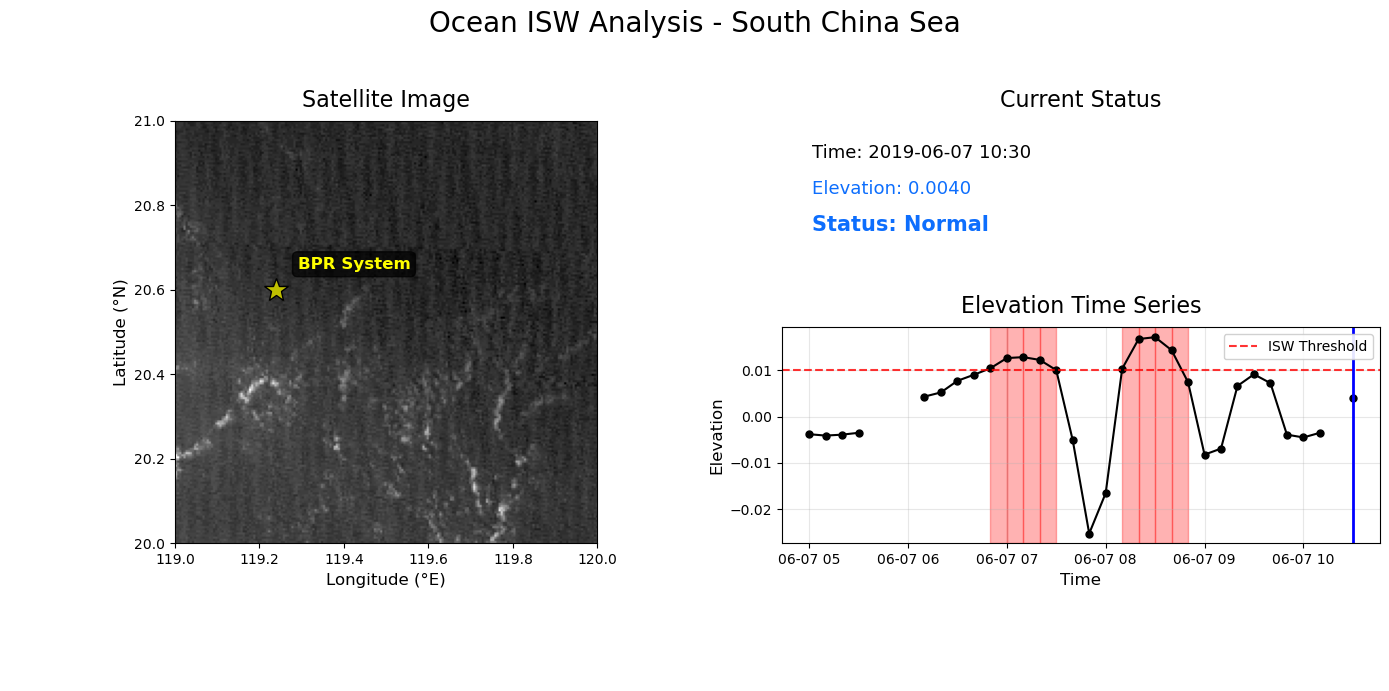

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import numpy as np
from PIL import Image
import os
from datetime import datetime
import matplotlib.patches as mpatches

# Read the resampled Elevation data
elevation_df = pd.read_csv('elevation_data_20190607_10min.csv')
elevation_df['Time'] = pd.to_datetime(elevation_df['Time'])

# Create time and filename mapping
def get_image_filename(timestamp):
    return f"{timestamp.strftime('%Y%m%d%H%M')}.png"

# Set image path - use raw string to avoid escape characters
image_folder = r'C:\Users\Alan\Dropbox\Himawari8_Wave_Speed_Detection\Himawari8_wave_speed_detection\visualization\model_output\BPR_IW_comparision\Imgs/'

# Create figure with specific layout - 16:9 aspect ratio for widescreen PowerPoint
fig = plt.figure(figsize=(14, 7))

# Define grid layout with a more horizontal orientation and fixed aspect ratios
gs = plt.GridSpec(9, 9, figure=fig)

# Main satellite image area (left side)
ax_main = fig.add_subplot(gs[0:8, 0:6])

# Right side status panel 
status_panel = fig.add_subplot(gs[0:2, 6:9])
status_panel.axis('off')

# Elevation time series (bottom right)
ax_graph = fig.add_subplot(gs[2:6, 6:9])

# Detection criteria panel (bottom)
criteria_panel = fig.add_subplot(gs[8:9, :])
criteria_panel.axis('off')

# Initialize main image
initial_img = np.ones((200, 200, 3), dtype=np.uint8) * 255  # Adjusted to 200x200
satellite_img = ax_main.imshow(initial_img, extent=[119, 120, 20, 21])  # Set extent to match coordinates
ax_main.axis('on')  # Turn on axis to show coordinates
ax_main.set_xlabel('Longitude (°E)', fontsize=12)
ax_main.set_ylabel('Latitude (°N)', fontsize=12)
ax_main.set_title('Satellite Image', fontsize=16, pad=10)

# Convert pressure sensor coordinates from degrees, minutes to decimal degrees
sensor_lon = 119 + (14.4/60)
sensor_lat = 20 + (36/60)

# Add sensor location marker (yellow star)
sensor_marker, = ax_main.plot(sensor_lon, sensor_lat, 'y*', markersize=18, markeredgecolor='black')
sensor_text = ax_main.annotate('BPR System', xy=(sensor_lon, sensor_lat), 
                              xytext=(sensor_lon+0.05, sensor_lat+0.05),
                              color='yellow', fontweight='bold', fontsize=12,
                              bbox=dict(boxstyle="round,pad=0.3", fc='black', alpha=0.7))

# Style the status panel with a cleaner look
status_panel.patch.set_alpha(0.85)
status_panel.patch.set_facecolor('#f8f9fa')  # Light gray background
status_panel.patch.set_edgecolor('#343a40')  # Dark border
status_panel.patch.set_linewidth(1.5)
status_panel.set_title('Current Status', fontsize=16, pad=10)

# Add text to status panel with explicit positioning
time_text = status_panel.text(0.05, 0.75, 'Time: 2019-06-07 10:30', fontsize=13)
elevation_text = status_panel.text(0.05, 0.5, 'Elevation: 0.0040', fontsize=13, color='#0d6efd')
status_text = status_panel.text(0.05, 0.25, 'Status: Normal', fontsize=15, fontweight='bold', color='#0d6efd')

# Add Elevation time series with better styling
ax_graph.plot(elevation_df['Time'], elevation_df['Elevation'], '-o', color='black', markersize=5)
ax_graph.axhline(y=0.01, color='red', linestyle='--', alpha=0.8, linewidth=1.5, label='ISW Threshold')
ax_graph.set_ylabel('Elevation', fontsize=12)
ax_graph.set_xlabel('Time', fontsize=12)
ax_graph.grid(True, alpha=0.3)
ax_graph.legend(loc='upper right', framealpha=0.9)
ax_graph.set_title('Elevation Time Series', fontsize=16, pad=10)

# Create vertical line to mark current time
time_line = ax_graph.axvline(x=elevation_df['Time'].iloc[0], color='blue', linestyle='-', linewidth=2)

# Highlight internal wave regions with slightly more transparent highlighting
for i in range(len(elevation_df)-1):
    if not np.isnan(elevation_df['Elevation'].iloc[i]) and elevation_df['Elevation'].iloc[i] > 0.01:
        ax_graph.axvspan(elevation_df['Time'].iloc[i], 
                         elevation_df['Time'].iloc[i+1], 
                         alpha=0.3, color='red')

def update(frame_idx):
    if frame_idx >= len(elevation_df):
        return satellite_img, time_line, time_text, elevation_text, status_text
    
    # Get current time
    current_time = elevation_df['Time'].iloc[frame_idx]
    current_elevation = elevation_df['Elevation'].iloc[frame_idx]
    
    # Update satellite image
    filename = get_image_filename(current_time)
    full_path = os.path.join(image_folder, filename)
    
    if os.path.exists(full_path):
        try:
            img = np.array(Image.open(full_path))
            satellite_img.set_array(img)
        except Exception as e:
            print(f"Cannot read image {filename}: {e}")
    
    # Update time line position
    time_line.set_xdata(current_time)
    
    # Update data display with guaranteed visible text
    time_text.set_text(f'Time: {current_time.strftime("%Y-%m-%d %H:%M")}')
    
    if np.isnan(current_elevation):
        elevation_text.set_text(f'Elevation: No data')
        elevation_text.set_color('gray')
        status_text.set_text('Status: Undetermined')
        status_text.set_color('gray')
    else:
        elevation_text.set_text(f'Elevation: {current_elevation:.4f}')
        
        if current_elevation > 0.01:
            elevation_text.set_color('#dc3545')  # Bootstrap red
            status_text.set_text('Status: ISW')
            status_text.set_color('#dc3545')  # Bootstrap red
        else:
            elevation_text.set_color('#0d6efd')  # Bootstrap blue
            status_text.set_text('Status: Normal')
            status_text.set_color('#0d6efd')  # Bootstrap blue
    
    return satellite_img, time_line, time_text, elevation_text, status_text

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(elevation_df),
                             interval=500, blit=True)

plt.suptitle('Ocean ISW Analysis - South China Sea', fontsize=20, y=0.98)

# Adjust layout - less aggressive adjustment to prevent text overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# OPTION 1: Try saving with a different writer
try:
    # First try with ffmpeg writer with specific codec settings
    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=2, metadata=dict(artist='Me'), bitrate=1800,
                    extra_args=['-vcodec', 'libx264', '-pix_fmt', 'yuv420p'])
    ani.save('Ocean_ISW_Analysis_20190607_widescreen.mp4', writer=writer, dpi=100)
    print("Successfully saved video with ffmpeg writer")
except Exception as e:
    print(f"Error with ffmpeg writer: {e}")
    
    # OPTION 2: Try saving as frames
    print("Saving as series of PNG files instead...")
    # Create output directory if it doesn't exist
    os.makedirs("animation_frames_widescreen", exist_ok=True)
    
    # Manually save each frame
    for i in range(len(elevation_df)):
        update(i)
        plt.savefig(f"animation_frames_widescreen/frame_{i:03d}.png", dpi=100)
        print(f"Saved frame {i+1}/{len(elevation_df)}")
    
    print("All frames saved. You can use external software to combine these into a video.")

plt.show()